<a href="https://colab.research.google.com/github/BingHung/AI/blob/master/%5B02162019_8%5D_RT_TEST_on_Colabv6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from PIL import Image
from skimage import color
import numpy as np
import os
from glob import glob

import re
import keras
from keras.optimizers import SGD, Adam
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import cv2
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [0]:
# 定義讀取影像函數：
x_s = 250
y_s = 200
def read_img(location): # 把影像放在Location所代表的路徑
    x_train = [] 
    y_train = [] 
    x_test = [] 
    y_test = [] 
    label_name = [] 
    dirs = os.listdir(location) #import os這個module協助我們遍尋整個資料夾目錄
    #listdir( )這個function，會找遍傳進去的路徑底下的所有檔案。因此就可以使用for in迴圈把所有的檔案印出來：
    label = 0 
    count = 0
    for i in dirs: #loop all directory         
        print(i) #印出檔案夾名稱
        n = 0 
        label_name.append(i) #save folder name in var label_name        
        filenames = glob(location+'//'+i+'/*.tif') + glob(location+'//'+i+'/*.JPEG')   # i 代表第幾個檔案夾.
        if( i == "NG"):
            for pic in filenames:
                im0 = cv2.imread(pic, 0) #open data
                print(pic)
                # 將每張NG底片平移產生多張底片
                for j in range(45,140,2):
                    im_l = j
                    im_r = j+500
                    im = im0[50:450,im_l:im_r]  # "高度,寬度"上下各縮減
                  
                    im = cv2.resize(im, (x_s, y_s))                                 
                    # im = np.array(im) #store im as numpy array
                    im = im.astype(np.float32)
                    im = (im - np.min(im)) / (np.max(im) - np.min(im)) #標準化#
              
                    if(n % 5 == 0):
                        x_test.append(im) #save in x_test  
                        y_test.append([label]) #save in y_test
                    else: #remaining data set as training data. Train data is about 90%
                        x_train.append(im) #save in x_train
                        y_train.append([label]) #save in y_train
                    print("Shift -- ",im_l,im_r," Total =",count)
                 
                    n = n + 1 
                    count = count + 1 
        else:
            for pic in filenames:
                im0 = cv2.imread(pic, 0) #open data
                print(pic)
                # 將每張GOOD底片平移產生3張底片
                for j in range(45,140,40):
                    im_l = j
                    im_r = j+500
                    im = im0[50:450,im_l:im_r]  # "高度,寬度"上下各縮減
                  
                    im = cv2.resize(im, (x_s, y_s))                                 
                    # im = np.array(im) #store im as numpy array
                    im = im.astype(np.float32)
                    im = (im - np.min(im)) / (np.max(im) - np.min(im)) #標準化#
              
                    if(n % 5 == 0):
                        x_test.append(im) #save in x_test  
                        y_test.append([label]) #save in y_test
                    else: #remaining data set as training data. Train data is 80%
                        x_train.append(im) #save in x_train
                        y_train.append([label]) #save in y_train
                    print("Shift -- ",im_l,im_r," Total =",count)
                 
                    n = n + 1 
                    count = count + 1 
                                                    
        label = label + 1 #increment label
        print(label_name)
        print(dirs)
    return np.array(x_train),np.array(y_train),np.array(x_test),np.array(y_test)

In [0]:
#通过定义的函数生成训练数据、训练标签、测试数据、测试标签：
#输出的结果：完成对11个文件夹的遍历，并输出训练标签向量和测试标签向量：
# 檔案放在與程式同層資料夾 "FHI_RT"
path='/content/gdrive/My Drive/FHI_RT/Train'

train_dirs = os.listdir(path) #import os這個module協助我們遍尋整個資料夾目錄

img_rows = x_s  #num of image height
img_cols = y_s  #num of image width
num_class = 2 #num of classes/labels
x_train,y_train,x_test,y_test = read_img(path) 

NG
/content/gdrive/My Drive/FHI_RT/Train//NG/20120816E112L-NO.03W08(氣孔 P).tif
Shift --  139 639  Total = 0
/content/gdrive/My Drive/FHI_RT/Train//NG/0-B213-WC13X-2-63.5-5.08-20130528.tif
Shift --  139 639  Total = 1
/content/gdrive/My Drive/FHI_RT/Train//NG/20120808 NO25 W5(氣孔 P).tif
Shift --  139 639  Total = 2
/content/gdrive/My Drive/FHI_RT/Train//NG/0-B210-WC14X-63.5-5.08-20130527.tif
Shift --  139 639  Total = 3
/content/gdrive/My Drive/FHI_RT/Train//NG/0-B213-WC13Y-2-63.5-5.08-20130528.tif
Shift --  139 639  Total = 4
/content/gdrive/My Drive/FHI_RT/Train//NG/0-B213-WC13Y-63.5-5.08-20130528.tif
Shift --  139 639  Total = 5
/content/gdrive/My Drive/FHI_RT/Train//NG/20120814 E109M-2 NO3 W5(內焊冠過高).tif
Shift --  139 639  Total = 6
/content/gdrive/My Drive/FHI_RT/Train//NG/20120808 NO11 W1(氣孔 P).tif
Shift --  139 639  Total = 7
/content/gdrive/My Drive/FHI_RT/Train//NG/NO17 W1(氣孔 P).tif
Shift --  139 639  Total = 8
/content/gdrive/My Drive/FHI_RT/Train//NG/20160317-1X(3)(內焊冠過高).tif
Sh

In [0]:
# train_dirs #check data

In [0]:
#將訓練資料的分類資料夾 以dictionary存起來
predict_dic ={}
class_names =[]
for i in range(len(train_dirs)):
    predict_dic[i] =train_dirs[i]
    class_names.append(train_dirs[i])
predict_dic

{0: 'NG', 1: 'GOOD'}

In [0]:
# x_train.shape #check data

No.- 0 (200, 250)


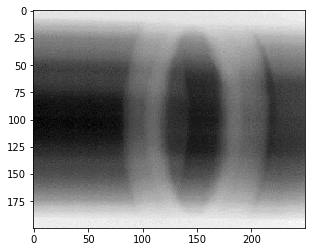

No.- 1 (200, 250)


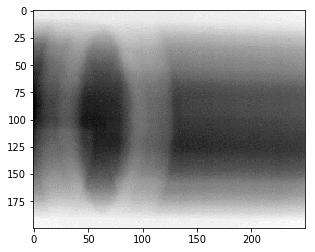

No.- 2 (200, 250)


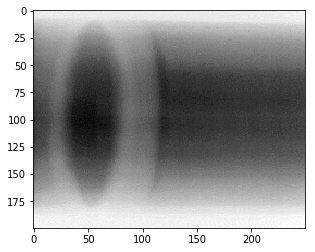

No.- 3 (200, 250)


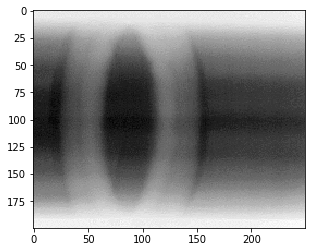

No.- 4 (200, 250)


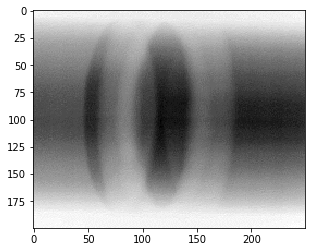

No.- 5 (200, 250)


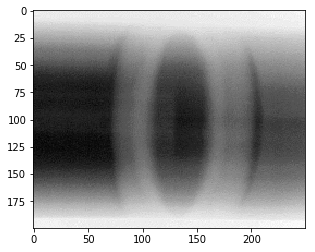

No.- 6 (200, 250)


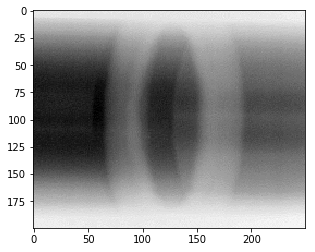

No.- 7 (200, 250)


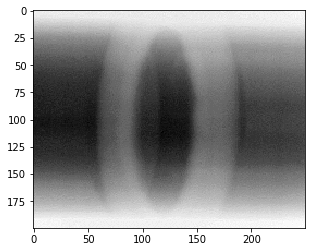

No.- 8 (200, 250)


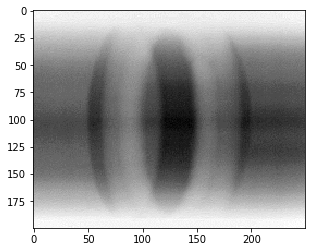

No.- 9 (200, 250)


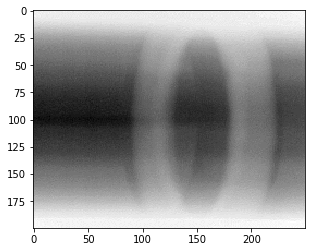

No.- 10 (200, 250)


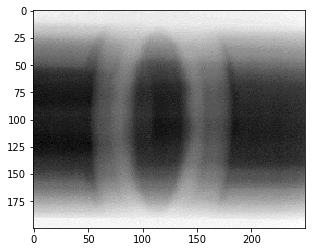

No.- 11 (200, 250)


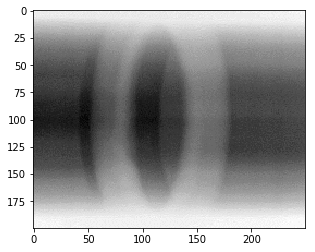

No.- 12 (200, 250)


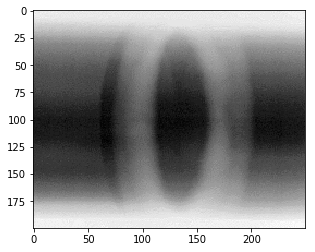

No.- 13 (200, 250)


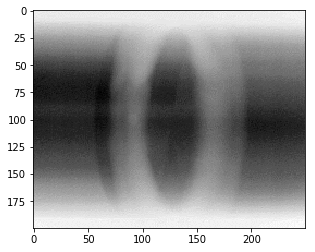

No.- 14 (200, 250)


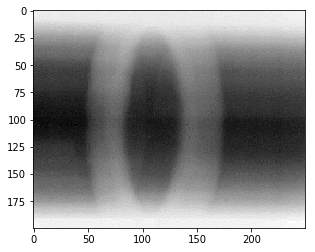

No.- 15 (200, 250)


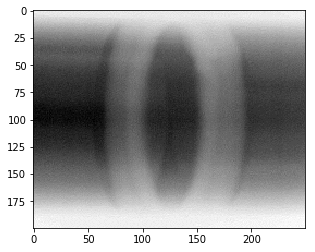

No.- 16 (200, 250)


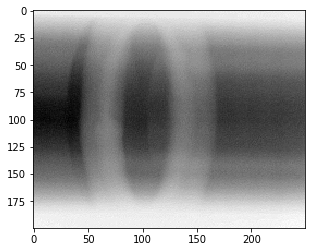

No.- 17 (200, 250)


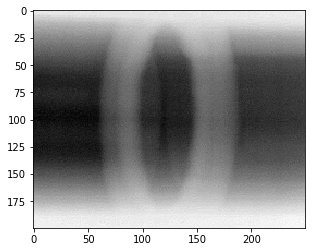

No.- 18 (200, 250)


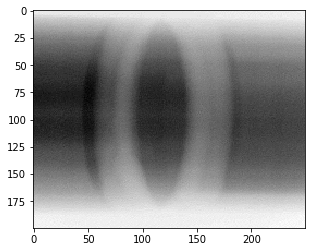

No.- 19 (200, 250)


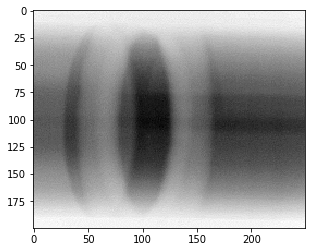

No.- 20 (200, 250)


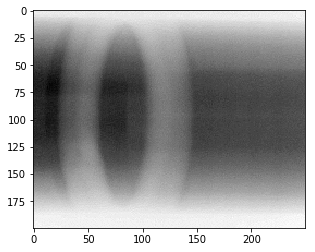

No.- 21 (200, 250)


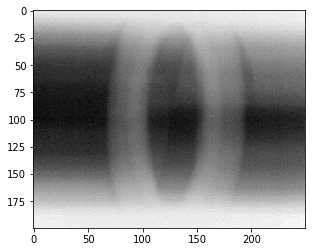

No.- 22 (200, 250)


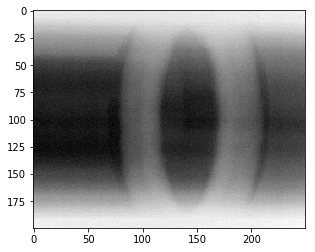

No.- 23 (200, 250)


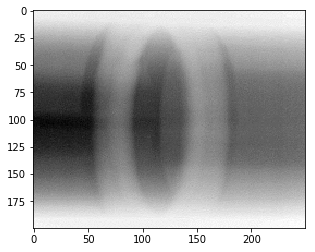

No.- 24 (200, 250)


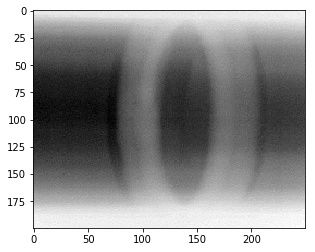

No.- 25 (200, 250)


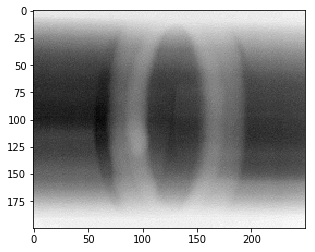

No.- 26 (200, 250)


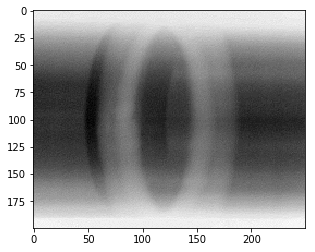

No.- 27 (200, 250)


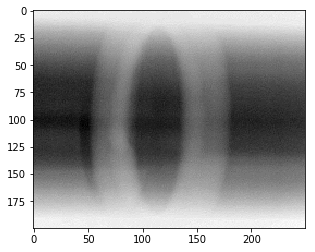

No.- 28 (200, 250)


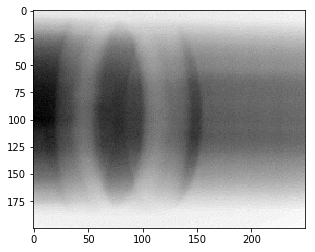

No.- 29 (200, 250)


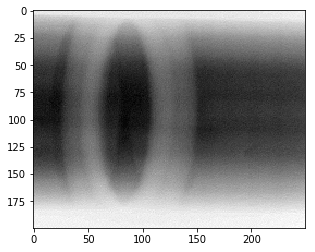

No.- 30 (200, 250)


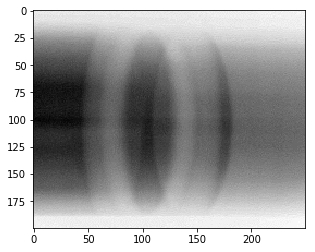

No.- 31 (200, 250)


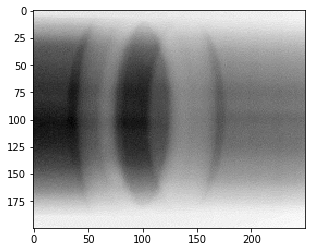

No.- 32 (200, 250)


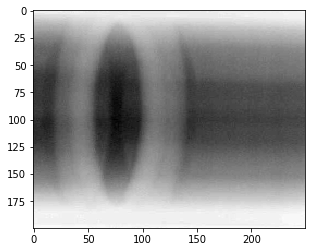

No.- 33 (200, 250)


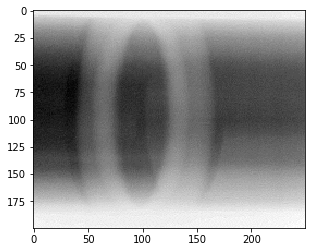

No.- 34 (200, 250)


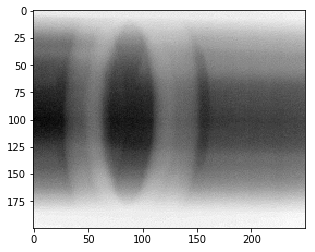

No.- 35 (200, 250)


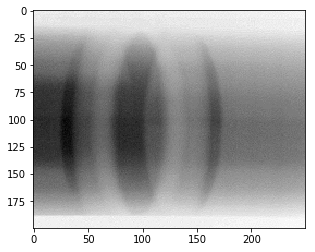

No.- 36 (200, 250)


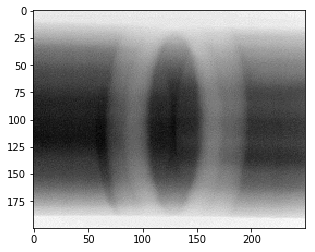

No.- 37 (200, 250)


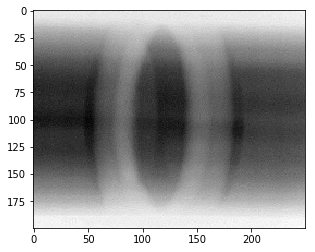

No.- 38 (200, 250)


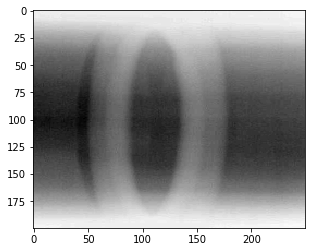

No.- 39 (200, 250)


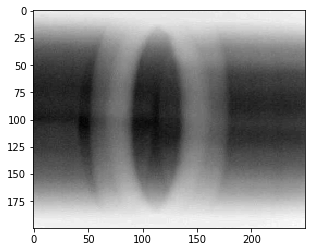

No.- 40 (200, 250)


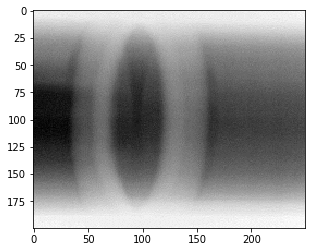

No.- 41 (200, 250)


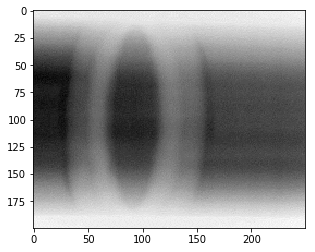

No.- 42 (200, 250)


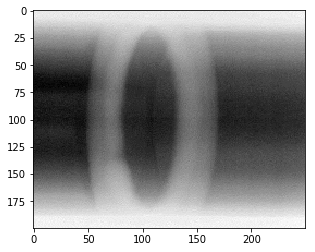

No.- 43 (200, 250)


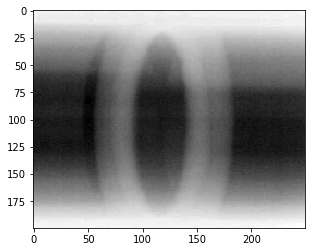

No.- 44 (200, 250)


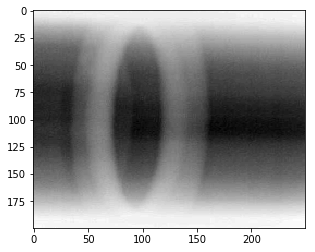

No.- 45 (200, 250)


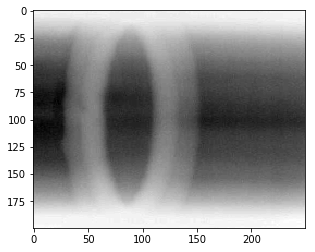

No.- 46 (200, 250)


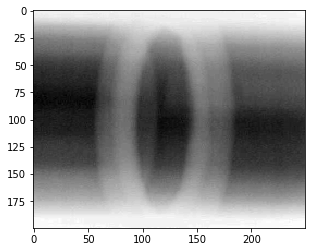

No.- 47 (200, 250)


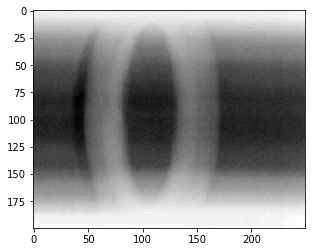

No.- 48 (200, 250)


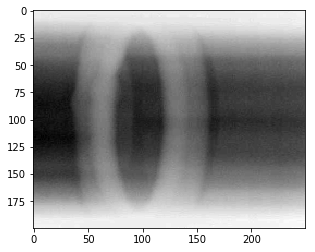

No.- 49 (200, 250)


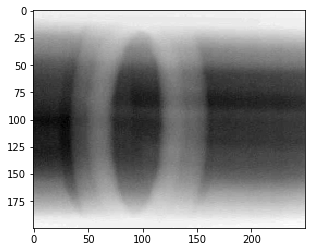

In [0]:
# 觀察處理後的訓練照片是否正確
# for k in range(0,50,1):   
#   img9=x_train[k]
#   print("No.-",k,img9.shape)    # 
#   plt.imshow(img9,'gray')
#   plt.show()

In [0]:
#将标签转化为向量，以便用交叉熵计算loss值：

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
input_shape = x_train[0].shape  # (img_rows, img_cols, 1)

y_train = keras.utils.to_categorical(y_train, num_class) 
y_test = keras.utils.to_categorical(y_test, num_class) 

In [0]:
#输出训练训练特征矩阵、训练标签向量、测试特征矩阵、测试标签向量的维度：
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(606, 250, 200, 1)
(606, 2)
(152, 250, 200, 1)
(152, 2)


In [0]:
#定义CNN神经网络模型：
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_class, activation='softmax'))

In [0]:
#编译模型：用交叉熵作为损失值，随机梯度下降作为优化器，预测的准确率用以定义模型的好坏。
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [0]:
#训一次模型并保存：模型一个批次处理64个样本，迭代1次，用测试集数据做验证。

model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=1, validation_data=(x_test, y_test))

Train on 606 samples, validate on 152 samples
Epoch 1/1
606/606 [==============================] - 5s 9ms/step - loss: 0.3953 - acc: 0.8515 - val_loss: 0.3155 - val_acc: 0.9211


In [0]:
model.save('/content/gdrive/My Drive/FHI_RT/1226.h5') #將訓練模型存起來

In [0]:
#循环进行模型训练，每一次循环迭代一次训练，保存并读取模型，循环十次，这样写是因为避免显存溢出导致之前所有训练结果丢失。该语句可重复运行。机器学习，俗称“炼丹”
for i in range(0,39):
    print('The '+str(i)+' th Iteration')
    model=load_model('/content/gdrive/My Drive/FHI_RT/1226.h5')
    model.fit(x_train, y_train, batch_size=64, epochs=1, verbose=1, validation_data=(x_test, y_test))
    model.save('/content/gdrive/My Drive/FHI_RT/1226.h5')
    K.clear_session()

The 0 th Iteration
Train on 606 samples, validate on 152 samples
Epoch 1/1
606/606 [==============================] - 2s 3ms/step - loss: 0.2838 - acc: 0.9241 - val_loss: 0.3443 - val_acc: 0.9211
The 1 th Iteration
Train on 606 samples, validate on 152 samples
Epoch 1/1
606/606 [==============================] - 2s 3ms/step - loss: 0.2772 - acc: 0.9241 - val_loss: 0.3475 - val_acc: 0.9211
The 2 th Iteration
Train on 606 samples, validate on 152 samples
Epoch 1/1
606/606 [==============================] - 2s 3ms/step - loss: 0.2798 - acc: 0.9241 - val_loss: 0.3694 - val_acc: 0.9211
The 3 th Iteration
Train on 606 samples, validate on 152 samples
Epoch 1/1
606/606 [==============================] - 2s 3ms/step - loss: 0.2754 - acc: 0.9241 - val_loss: 0.3439 - val_acc: 0.9211
The 4 th Iteration
Train on 606 samples, validate on 152 samples
Epoch 1/1
606/606 [==============================] - 2s 3ms/step - loss: 0.2743 - acc: 0.9241 - val_loss: 0.3626 - val_acc: 0.9211
The 5 th Iteration
T

In [0]:
from keras.models import load_model
import cv2
import numpy as np
import pandas as pd

#Load model
model = load_model('/content/gdrive/My Drive/FHI_RT/1226.h5')

#define model detail parameter
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [0]:
# predict_dic[0] #check data

In [0]:
#start all testset image prediction
#assign path location
tfpath="/content/gdrive/My Drive/FHI_RT/Testset"
test_image_path = tfpath #你要預測的資料夾

target_csv ="/content/gdrive/My Drive/FHI_RT/check.csv"
predict_csv ="/content/gdrive/My Drive/FHI_RT/predict.csv"
ans = pd.DataFrame() #轉csv檔使用
ans2 = pd.DataFrame() #轉csv檔使用
iCount=0
file_list = []
target_list =[] #target
a_preds =[] #預測結果
sub_dirs = sorted(x[0] for x in tf.gfile.Walk(test_image_path))
for i in range(1,len(sub_dirs)):
    sub_dir =sub_dirs[i]
    foldname = os.path.basename(sub_dir)    
    tmp_list = tf.gfile.Glob(os.path.join(sub_dir, '*.jpg'))
    for j in range(len(tmp_list)):
        iCount +=1
        file_list.append(tmp_list[j])
        target_list.append(foldname)
        #load image
        im = cv2.imread(tmp_list[j], 0) #open data
        im = im[50:450, 70:570]  # "高度,寬度"上下各縮減
        im = cv2.resize(im, (x_s, y_s))
        #
        im = im.astype(np.float32)
        im = (im - np.min(im)) / (np.max(im) - np.min(im)) #標準化
        im = np.reshape(im,[1,img_rows, img_cols, 1])
        # print(im.shape) #check data
        classes = model.predict_classes(im)
        a_preds.append(predict_dic[classes[0]]) #預測結果
        
#轉出csv檔案
#預測資料:預測答案 ->predict.csv
ans2["Id"]= file_list
ans2["Class"]= a_preds
ans2.to_csv(predict_csv, index=False)        
#預測資料:正確答案 ->check.csv
ans["Id"]= file_list
ans["Class"]= target_list
ans.to_csv(target_csv, index=False)

In [0]:
#繪圖
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

df_check = pd.read_csv(target_csv)
df_predict = pd.read_csv(predict_csv)
predict =df_predict["Class"]
test_labels =df_check["Class"]

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=14)
    plt.yticks(tick_marks, classes,fontsize=14)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=20)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

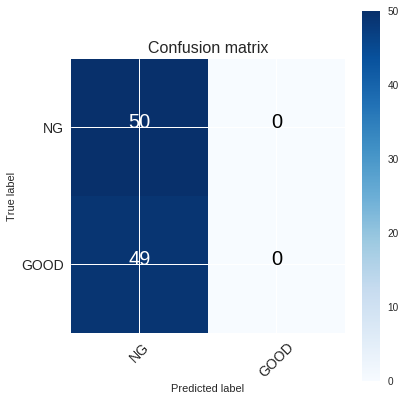

In [0]:
cnf_matrix = confusion_matrix(test_labels, predict)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=class_names)
plt.show()

In [0]:
#計算
error_list=[] #紀錄錯誤位置
correct =0
incorrect=0
total =len(test_labels)
for i in range(total):
    if test_labels[i] ==predict[i]:
        correct +=1
    else:
        error_list.append(i)
        incorrect +=1
        
print("正確率: %0.1f"%(correct/total*100),"%")
print("錯誤率: %0.1f"%(incorrect/total*100),"%")        

正確率: 50.5 %
錯誤率: 49.5 %


In [0]:
error_list

[50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98]